In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [14]:
# Read the X from the csv file
dataFrame = pd.read_csv('./dataGenerator/linearSeperableData.csv', header=None)
dataFrame.columns = ['x1', 'x2', 'y']
print(dataFrame.head())

# convert the dataFrame to numpy array
X = np.array(dataFrame[['x1', 'x2']])
Y = np.array(dataFrame['y'])

print(X)

          x1         x2  y
0  13.107576 -84.855860  0
1  -9.655098 -78.347790  1
2  15.890889  83.281850  0
3   0.765360   1.320530  0
4   6.920421 -16.537045  0
[[ 13.10757561 -84.85586029]
 [ -9.65509789 -78.34778977]
 [ 15.89088939  83.28185013]
 [  0.76535954   1.32052984]
 [  6.92042085 -16.53704538]
 [ 72.99672673 -15.42329028]
 [ 85.57857685  83.58494858]
 [-96.51765214 -28.57732844]
 [ 91.13469758  59.28683076]
 [-96.2385541   30.3174831 ]
 [ 28.42035311 -44.93350541]
 [ 23.29893655   5.17295863]
 [-31.42291558  62.80765459]
 [ 38.35247156  93.88241346]
 [-89.87164321  71.15728814]
 [-47.58743554 -11.81982699]
 [-61.35668423  99.26870967]
 [ -9.00102132 -49.65334066]
 [ 56.0142828   39.99614477]
 [-97.02315353 -76.89379418]
 [ 33.22148873  97.24891453]
 [-54.65210777 -57.40018136]
 [-96.12332742 -96.57601223]
 [-37.74234219 -14.72869371]
 [-76.64800382  66.69654571]
 [ 32.01224228  73.51853467]
 [ 68.61047569  84.34390505]
 [-38.24313657  40.01592089]
 [-97.42438191  25.1872713

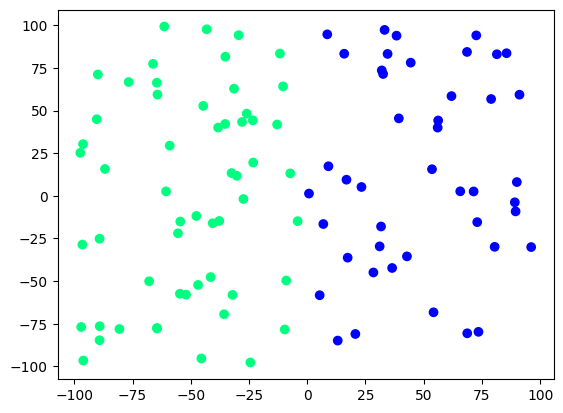

In [15]:
# ploting the X
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.show()

In [16]:
# Pocket Algorithm

numFeatures = 2
weights = np.zeros(numFeatures)
learningRate = 0.2
print("Dimension of weights: ", weights.shape)
print("Dimension of X[0]: ", X.shape)
print("Dimension of Y[0]: ", Y.shape)
done = False
maxIterations = 10000

while not done:
    misclassified = 0
    for i in range(len(X)):
        if np.dot(X[i], weights) > 0:
            predicted = 1
        else:
            predicted = 0
        
        if predicted != Y[i]:
            misclassified += 1
            weights += learningRate * (Y[i] - predicted) * X[i]

    if misclassified == 0 or maxIterations == 0:
        done = True
    maxIterations -= 1

print("Number of iterations: ", maxIterations)
print("Weights: ", weights)

Dimension of weights:  (2,)
Dimension of X[0]:  (100, 2)
Dimension of Y[0]:  (100,)
Number of iterations:  9996
Weights:  [-48.60796905   3.7307268 ]


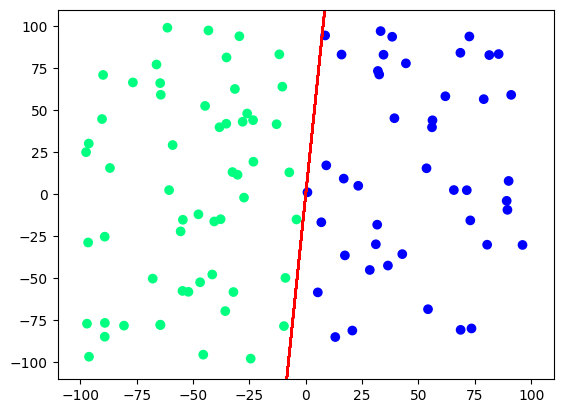

In [17]:
# plot data with linear seperator using weights
y_pred = []
for i in range(len(X)):
    y_pred.append(0 if np.sign(np.dot(X[i], weights)) == 1 else 1)

plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.plot(X[:,0], (-weights[0]/weights[1])*X[:,0], 'r-')
plt.xlim(-110, 110)
plt.ylim(-110, 110)
plt.show()